# TP 1 (17Co2024)
#### Integrantes
- Adassus, Luciano
- De Pedro Mermier, Ignacio
- Cagua, Jonathan

## Parte 1 (imágenes en /white_patch y /coord_cromaticas):

### 1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

Para implementar el **algoritmo de pasaje a coordenadas cromáticas**, necesitamos convertir la imagen de RGB a un espacio de color en el que podamos normalizar las coordenadas de color, eliminando la influencia del brillo y el contraste. Esto se puede hacer transformando los valores RGB en coordenadas cromáticas usando el siguiente cálculo:

$$
r_c = \frac{R}{R + G + B}
$$

$$
g_c = \frac{G}{R + G + B}
$$

$$
b_c = \frac{B}{R + G + B}
$$

En este caso, $r_c + g_c + b_c = 1$, por lo que normalmente basta con calcular $r_c$ y $g_c$, ya que $b_c = 1 - r_c - g_c$.


In [25]:
import numpy as np
import cv2 as cv

def convert_to_chromatic_coordinates(image_rgb):
    """
    Convierte una imagen en coordenadas cromáticas.
    
    Parámetros:
    - image_rgb: numpy.ndarray, imagen en formato RGB
    
    Retorna:
    - Imagen en coordenadas cromáticas
    """
    
    # Separar canales y convertir a float para evitar problemas de división
    R = image_rgb[:, :, 0].astype(float)
    G = image_rgb[:, :, 1].astype(float)
    B = image_rgb[:, :, 2].astype(float)
    
    # Calcular la suma de los canales y evitar división por cero
    sum_rgb = R + G + B
    sum_rgb[sum_rgb == 0] = 1

    # Calcular coordenadas cromáticas
    r_c = R / sum_rgb
    g_c = G / sum_rgb
    b_c = 1 - r_c - g_c, #aunque no es necesario visualizarlo

    # Crear la imagen en coordenadas cromáticas (solo r_c y g_c)
    chromatic_coordinates_image = np.stack([r_c, g_c, np.zeros_like(r_c)], axis=2)

    return chromatic_coordinates_image

---
#### Aplicamos el algoritmo (convert_to_chromatic_coordinates) y mostramos los resultados:

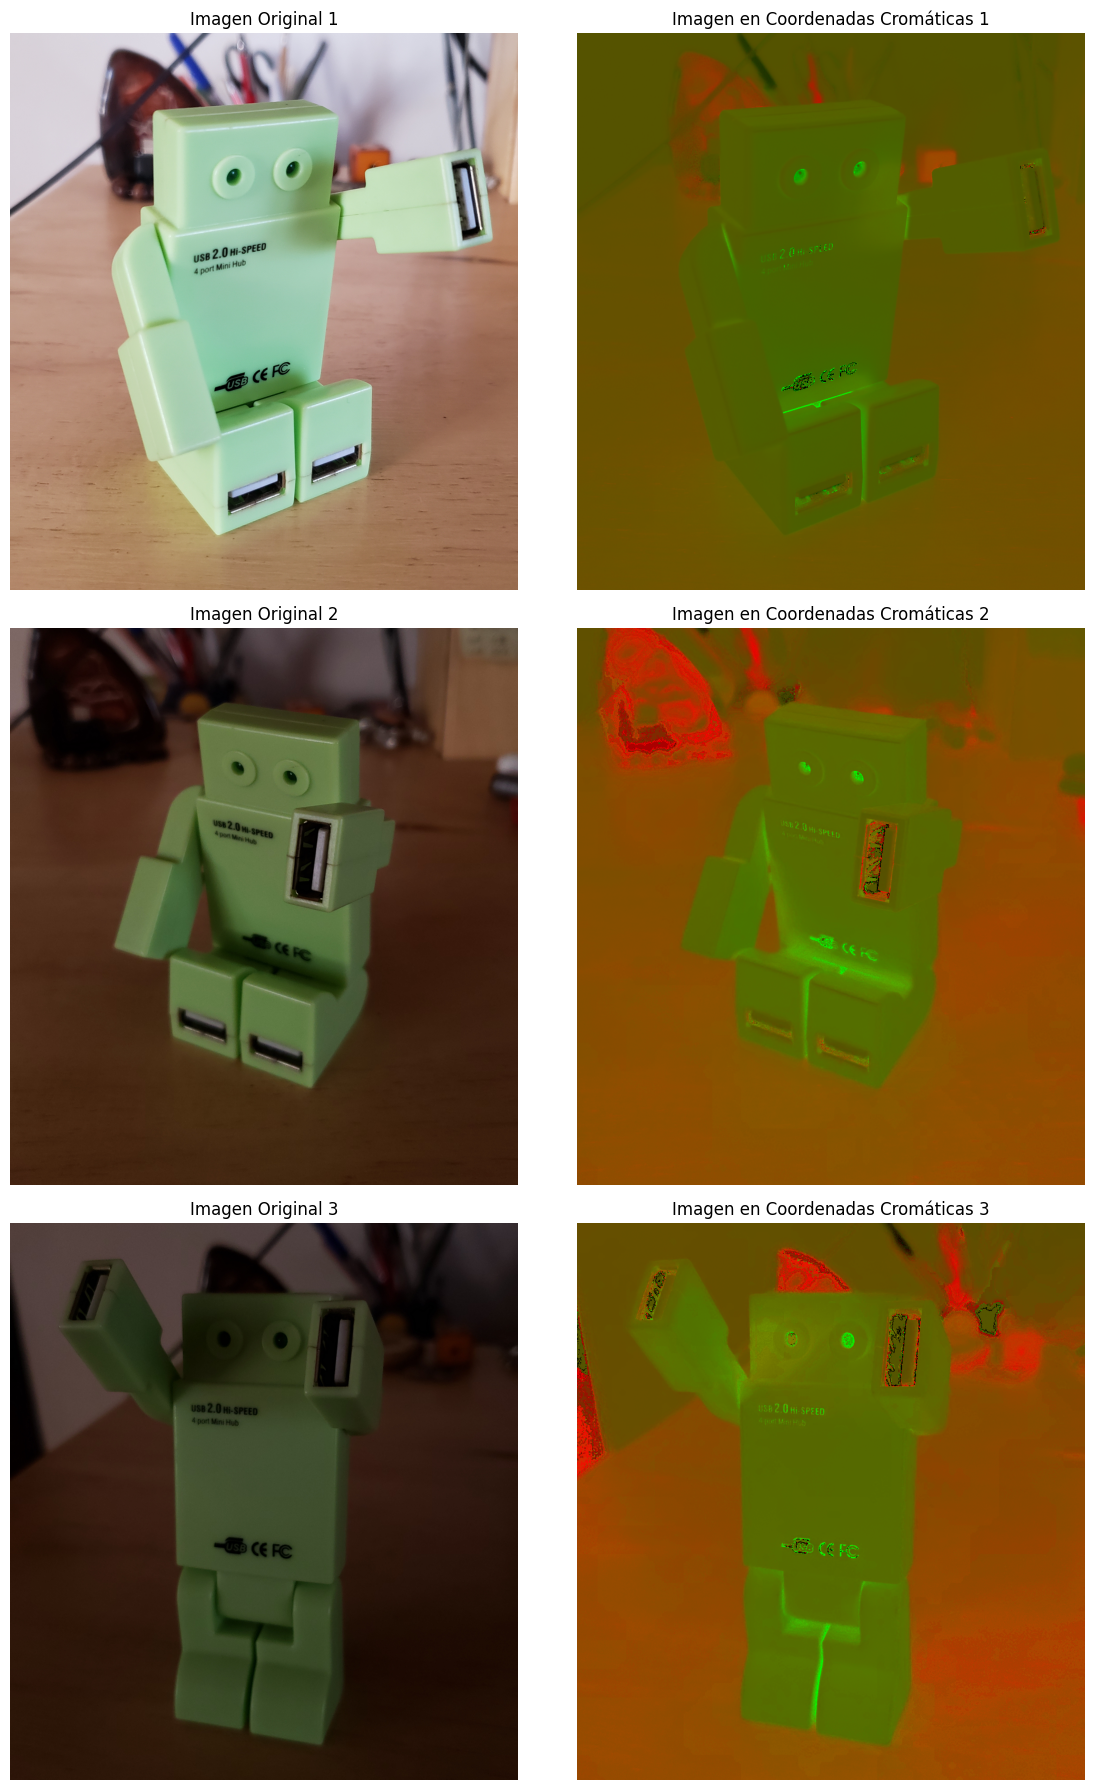

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt

# Lista de rutas de las imágenes
image_paths = [
    'img/coord_cromaticas/CoordCrom_1.png',
    'img/coord_cromaticas/CoordCrom_2.png',
    'img/coord_cromaticas/CoordCrom_3.png'
]

# Crear una figura para mostrar las imágenes
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

for i, image_path in enumerate(image_paths):
    # Cargar la imagen con OpenCV
    image = cv.imread(image_path)

    # Verificar si la imagen se cargó correctamente
    if image is None:
        print(f"Error: No se pudo cargar la imagen en la ruta {image_path}")
        continue    
    
    # Convertir de BGR a RGB para visualización en Matplotlib
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Aplicar la función para convertir a coordenadas cromáticas
    chromatic_coordinates = convert_to_chromatic_coordinates(image_rgb)

    # Mostrar las imágenes
    axes[i, 0].imshow(image_rgb)
    axes[i, 0].set_title(f"Imagen Original {i+1}")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(chromatic_coordinates)
    axes[i, 1].set_title(f"Imagen en Coordenadas Cromáticas {i+1}")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()

### 2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

El **Algoritmo White Patch** es una técnica utilizada en procesamiento de imágenes para corregir el color y ajustar el balance de blancos. Este método encuentra el valor más brillante de cada canal de color (R, G, B) y normaliza todos los píxeles de la imagen para que los valores más brillantes se ajusten al valor máximo (255), ayudando a eliminar dominancias de color.

#### Fórmula del Algoritmo

Para cada canal de color (R, G, B), el cálculo es el siguiente:

$$
R_{\text{white}} = \frac{R}{R_{\text{max}}} \times 255
$$

$$
G_{\text{white}} = \frac{G}{G_{\text{max}}} \times 255
$$

$$
B_{\text{white}} = \frac{B}{B_{\text{max}}} \times 255
$$

donde $R_{\text{max}}$, $G_{\text{max}}$ y $B_{\text{max}}$ son los valores máximos en los canales R, G y B, respectivamente.

In [27]:
import numpy as np
import cv2 as cv

def apply_white_patch(image_rgb):
    """
    Aplica el algoritmo White Patch a una imagen para balancear el color.
    
    Parámetros:
    - image_rgb: numpy.ndarray, imagen en formato RGB
    
    Retorna:
    - Imagen con el algoritmo White Patch aplicado
    """
    
    # Separar canales
    R = image_rgb[:, :, 0].astype(float)
    G = image_rgb[:, :, 1].astype(float)
    B = image_rgb[:, :, 2].astype(float)

    # Encontrar los valores máximos de cada canal
    R_max = R.max()
    G_max = G.max()
    B_max = B.max()

    # Normalizar cada canal al valor máximo (255)
    R_white = (R / R_max) * 255
    G_white = (G / G_max) * 255
    B_white = (B / B_max) * 255

    # Recombinar los canales normalizados
    white_patch_image = np.stack([R_white, G_white, B_white], axis=2).astype(np.uint8)

    return white_patch_image

---
#### Aplicamos el algoritmo (apply_white_patch) y mostramos los resultados:

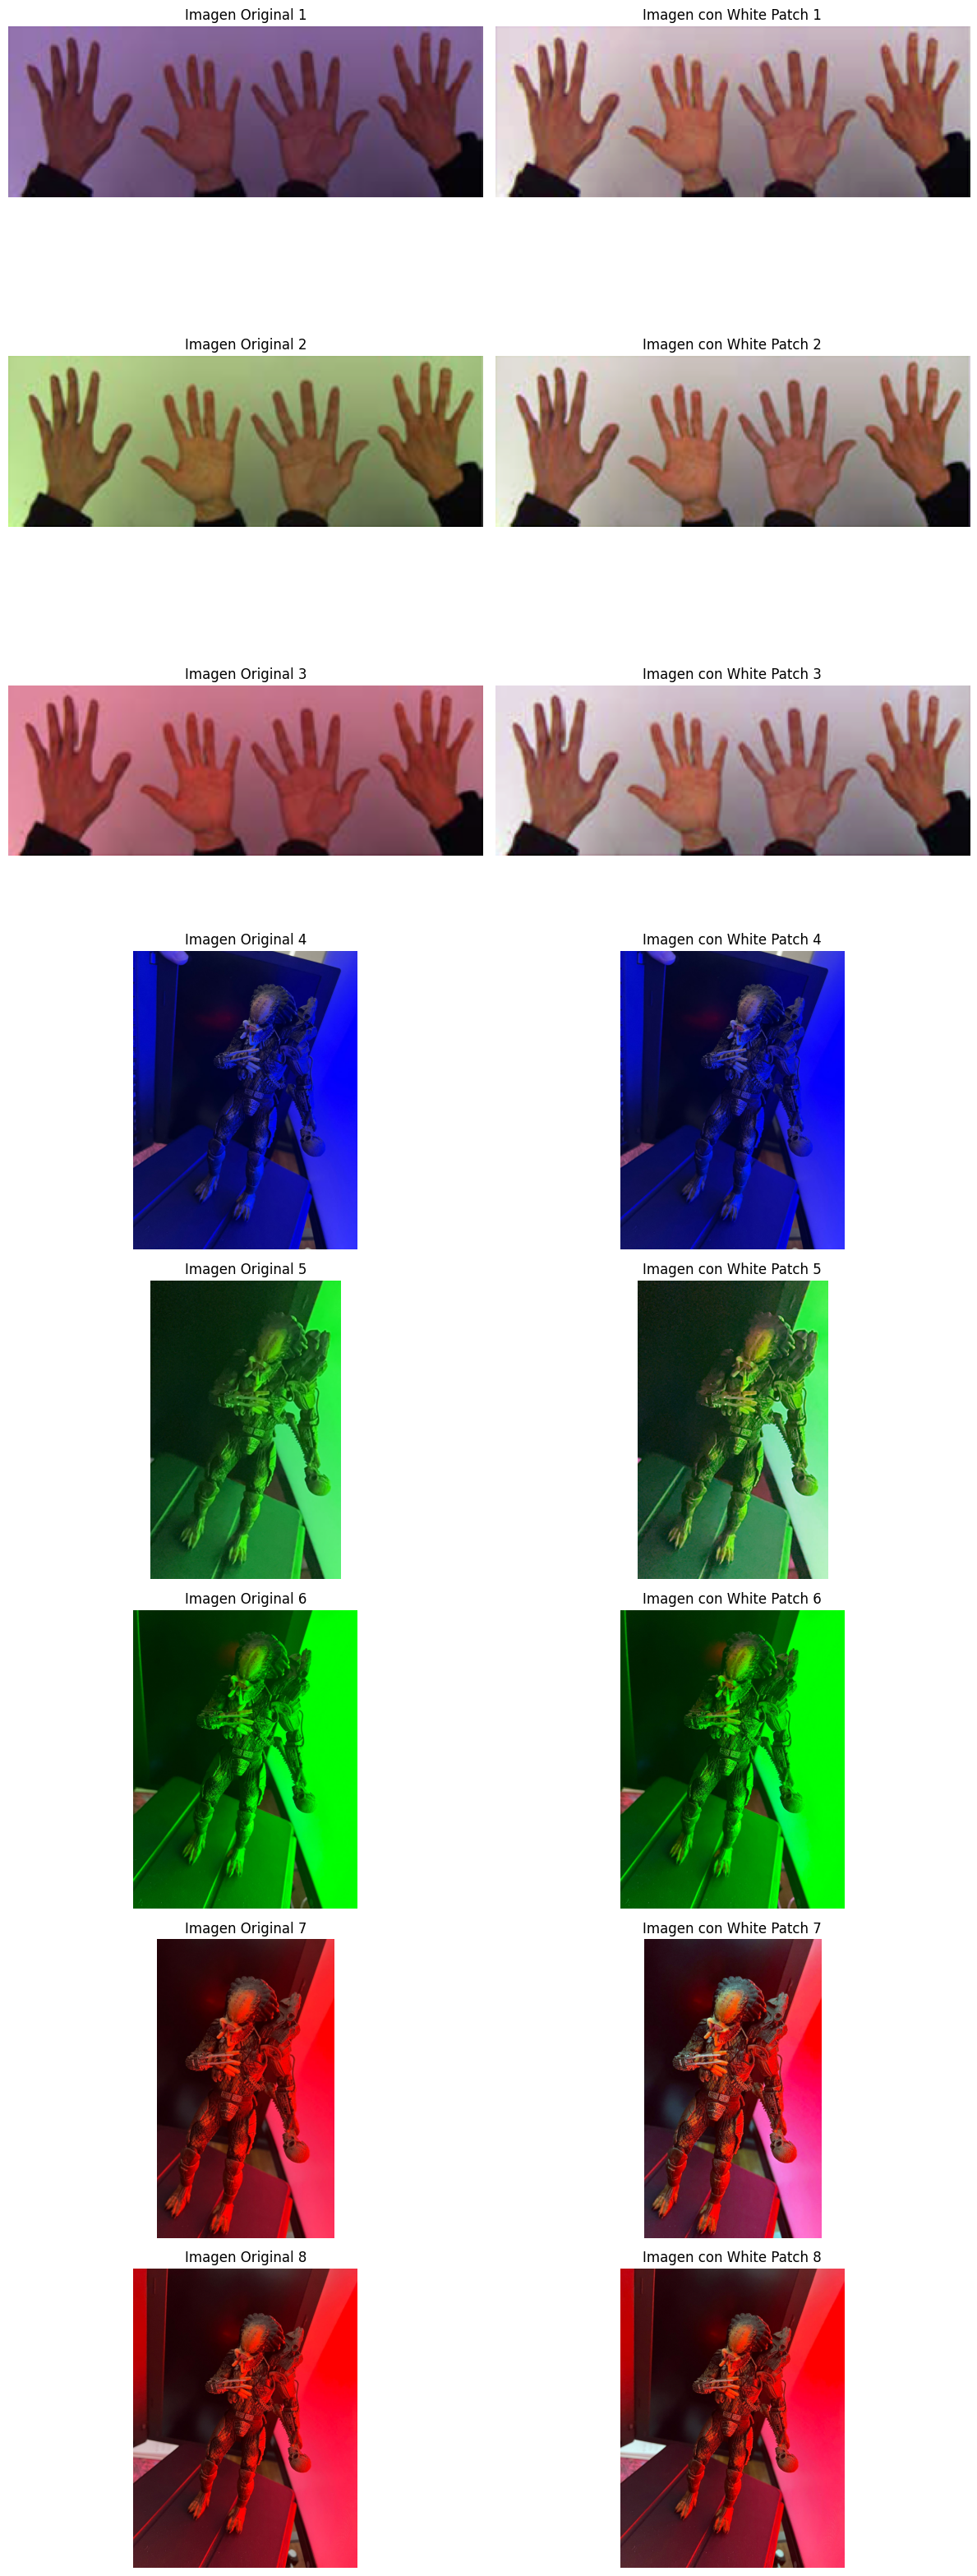

In [28]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Lista de rutas de las imágenes para el algoritmo de White Patch
white_patch_images = [
    'img/white_patch/test_blue.png',
    'img/white_patch/test_green.png',
    'img/white_patch/test_red.png',
    'img/white_patch/wp_blue.jpg',
    'img/white_patch/wp_green.png',
    'img/white_patch/wp_green2.jpg',
    'img/white_patch/wp_red.png',
    'img/white_patch/wp_red2.jpg'
]

# Crear una figura para mostrar las imágenes
fig, axes = plt.subplots(len(white_patch_images), 2, figsize=(12, 4 * len(white_patch_images)))

for i, image_path in enumerate(white_patch_images):
    # Cargar la imagen con OpenCV
    image = cv.imread(image_path)
    
    # Verificar si la imagen se cargó correctamente
    if image is None:
        print(f"Error: No se pudo cargar la imagen en la ruta {image_path}")
        continue
        
     # Convertir de BGR a RGB para que los colores se vean correctamente en matplotlib
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Aplicamos white patch
    white_patch_image = apply_white_patch(image_rgb)   

    # Mostrar la imagen original
    axes[i, 0].imshow(image_rgb)
    axes[i, 0].set_title(f"Imagen Original {i+1}")
    axes[i, 0].axis("off")
    
    # Mostrar la imagen con White Patch aplicado
    axes[i, 1].imshow(white_patch_image)
    axes[i, 1].set_title(f"Imagen con White Patch {i+1}")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()

### 3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

El **Algoritmo White Patch** ha sido aplicado a varias imágenes con diferentes dominancias de color (como azul, verde y rojo). A continuación se presentan las observaciones y el análisis de los resultados obtenidos:

#### Observaciones de los Resultados
1. **Eficiencia del Algoritmo**: En las imágenes ajustadas con White Patch, observamos que la dominancia de color se ha reducido y los colores en general parecen estar más balanceados. Esto es particularmente evidente en imágenes con una iluminación fuerte de un solo color.

2. **Comparación entre Imágenes Originales y Ajustadas**: 
   - En algunas imágenes, el ajuste logra reducir considerablemente la dominancia de un solo color, permitiendo que otros colores se vean con mayor naturalidad.
   - En otras, el ajuste no logra recuperar completamente los colores originales, especialmente en zonas donde el color dominante es muy fuerte.

#### Posibles Fallas y Limitaciones del Algoritmo White Patch
1. **Dependencia de Iluminación**: El algoritmo White Patch depende de que haya un punto máximo de brillo en cada canal (R, G, B). Si el color dominante de la iluminación es extremadamente fuerte, como en imágenes con iluminación roja o verde intensa, el ajuste puede no ser suficiente para recuperar los colores reales. Esto se debe a que el valor máximo de un canal puede llevar a una sobresaturación en los otros canales cuando se normalizan.

2. **Falta de Información de Color Original**: En situaciones donde la iluminación fuerte ha "quemado" los detalles de color en ciertas áreas de la imagen (como sucede a veces con luces muy intensas), el algoritmo no puede recuperar la información de color original, ya que no hay suficiente variabilidad de color en esas regiones.

3. **Efectos No Deseados**: En algunos casos, la normalización agresiva puede llevar a resultados no naturales, donde los colores quedan desbalanceados en lugar de corregidos, especialmente si uno de los canales tiene valores cercanos a cero en toda la imagen.

#### Conclusión
El algoritmo White Patch es efectivo en muchos casos para balancear el color y corregir dominancias, pero tiene limitaciones importantes en situaciones de iluminación extrema o cuando hay una falta de variabilidad en los colores originales de la imagen. Para estos casos, es posible que se requieran métodos más avanzados, como el algoritmo de corrección de color basado en histogramas o el ajuste de balance de blancos mediante técnicas de aprendizaje automático.


## Parte 2:

In [29]:
%matplotlib inline

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Rutas de las imágenes
image_tp_paths = ['img/img1_tp.png', 'img/img2_tp.png']
image_seg_path = 'img/segmentacion.png'

### 1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas. 

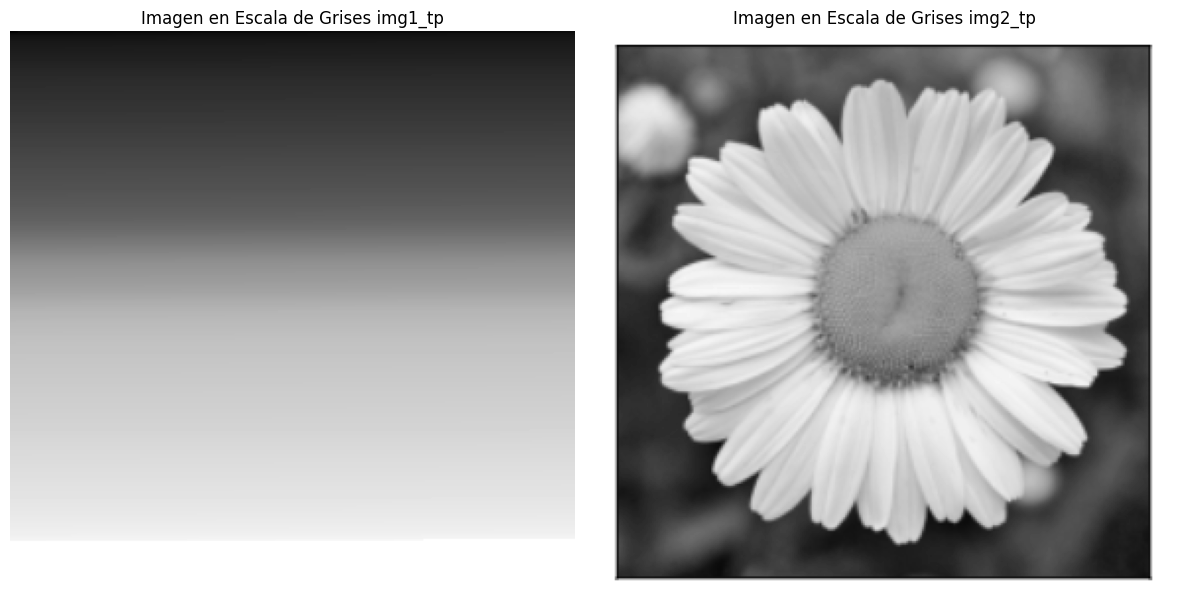

In [30]:
# Leer y mostrar cada imagen en escala de grises
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, image_path in enumerate(image_tp_paths):
    # Leer la imagen en escala de grises
    image_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    
    # Verificar si la imagen se cargó correctamente
    if image_gray is None:
        print(f"Error: No se pudo cargar la imagen en la ruta {image_path}")
        continue
    
    # Mostrar la imagen en escala de grises
    axes[i].imshow(image_gray, cmap='gray')
    axes[i].set_title(f"Imagen en Escala de Grises img{i+1}_tp")
    axes[i].axis("off")

plt.tight_layout()
plt.show()


### 2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. 
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, 
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

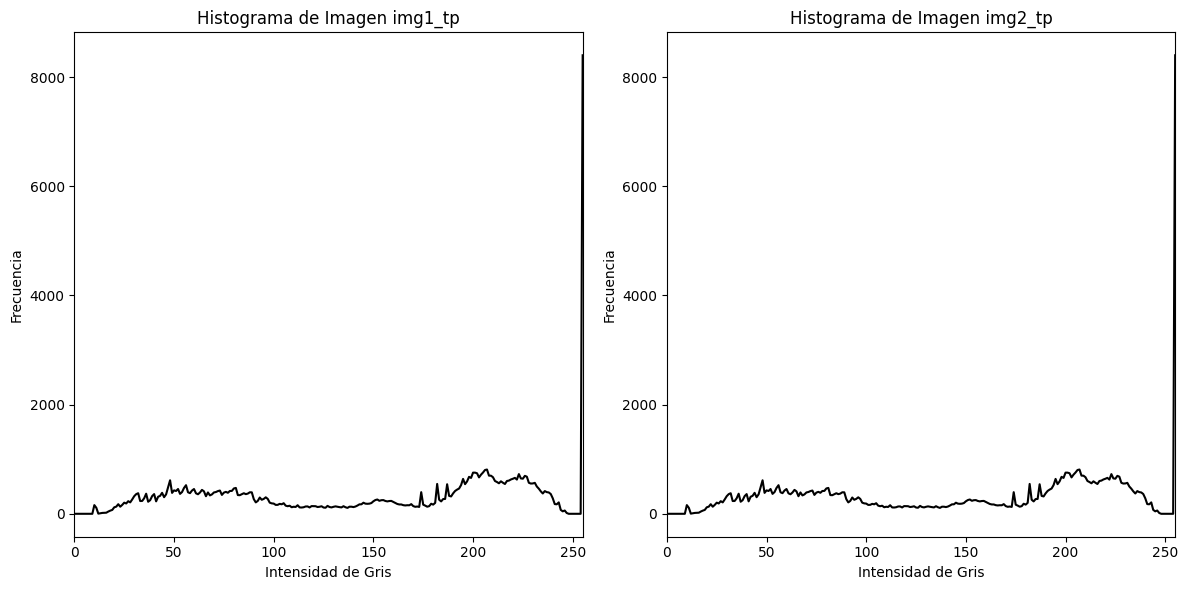

In [20]:
# Definir el número de bins para el histograma
bins = 256  # Uno para cada nivel de gris (0 a 255)

# Crear una figura para mostrar los histogramas de ambas imágenes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Calcular y mostrar el histograma de cada imagen
for i, image_path in enumerate(image_tp_paths):
    # Leer la imagen en escala de grises
    image_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    
    # Verificar si la imagen se cargó correctamente
    if image_gray is None:
        print(f"Error: No se pudo cargar la imagen en la ruta {image_path}")
        continue
    
    # Calcular el histograma
    histogram = cv.calcHist([image_gray], [0], None, [bins], [0, 256])
    
    # Graficar el histograma
    axes[i].plot(histogram, color='black')
    axes[i].set_xlim([0, bins - 1])
    axes[i].set_title(f"Histograma de Imagen img{i+1}_tp")
    axes[i].set_xlabel("Intensidad de Gris")
    axes[i].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

### Analisis

#### Observación de los Histogramas
1. **Similitud Visual**:
   - Al observar los histogramas de ambas imágenes, podemos notar que visualmente son muy similares. Esto se debe a que ambas imágenes (el degradado y la flor en blanco y negro) abarcan una amplia gama de tonos de gris y tienen una distribución continua de niveles de intensidad.
   - Aunque existen pequeñas diferencias en los picos y en la intensidad de ciertas frecuencias, estas diferencias no son suficientemente marcadas como para distinguirlas fácilmente al observar los histogramas.

2. **Limitaciones del Histograma**:
   - El histograma refleja únicamente la distribución global de los niveles de gris en cada imagen y no proporciona información sobre la disposición espacial o la estructura de los elementos en la imagen.
   - Esto significa que, aunque el degradado y la flor en blanco y negro tienen composiciones visuales y significados completamente diferentes, sus histogramas parecen similares debido a una distribución de grises amplia y uniforme.

#### Utilidad de los Histogramas como Características en Modelos de Clasificación/Detección de Imágenes
Los histogramas de intensidad pueden ser útiles como características básicas en modelos de clasificación o detección de imágenes, pero presentan limitaciones importantes en casos donde:
- **Las imágenes tienen distribuciones de gris similares**: Como en este ejemplo, donde el degradado y la flor tienen histogramas visualmente similares, el uso de histogramas puede no ser suficiente para distinguir entre imágenes con diferentes estructuras o significados.
- **Falta de Información Espacial**: Los histogramas no capturan la estructura, texturas, o la disposición de los objetos en la imagen, lo cual es esencial para muchos modelos de clasificación o detección.

#### Conclusión
Para un modelo de clasificación o detección de imágenes, los histogramas pueden servir como una característica inicial útil, capturando información básica sobre la distribución tonal en la imagen. Sin embargo, en muchos casos, y especialmente para tareas complejas, sería insuficiente usar solo histogramas como 'features'. Es recomendable combinar los histogramas con otras características que capturen texturas, bordes o patrones espaciales, lo cual proporciona una representación más completa de la imagen y permite una clasificación o detección más precisa.



### 3. Para la imagen segmentacion.png analice el histograma de los canales RGB.
Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes 
separadas.

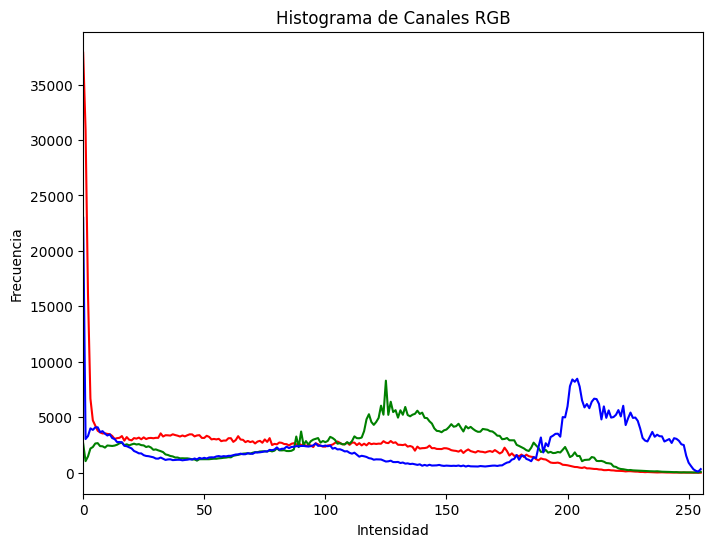

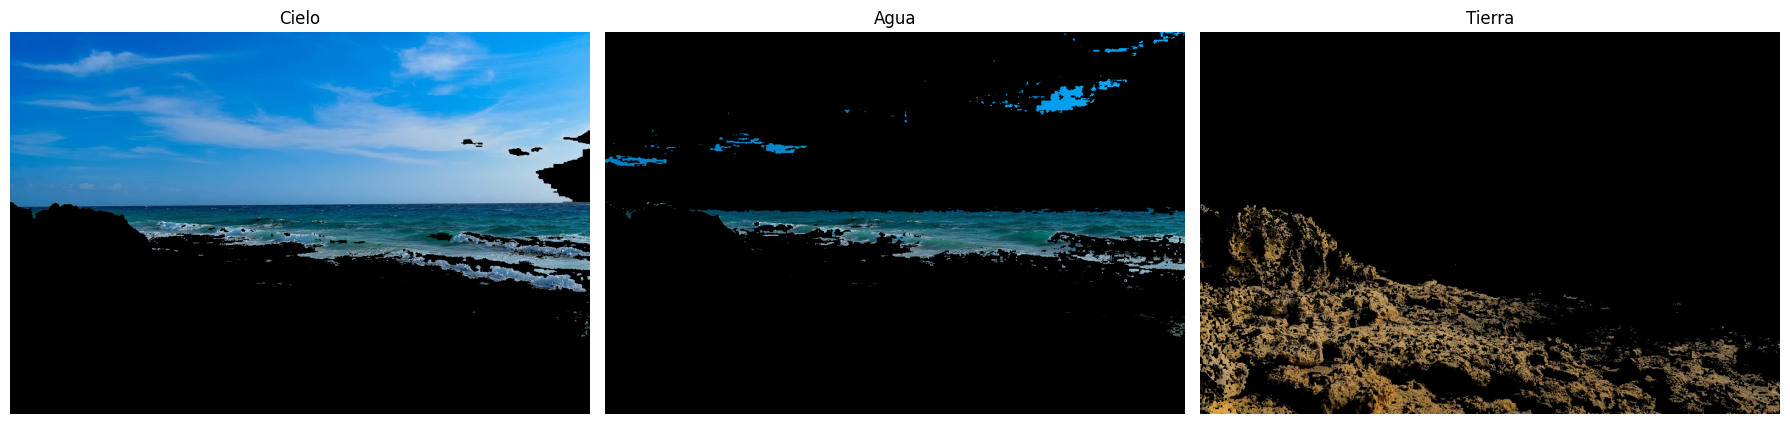

In [21]:
# Cargar la imagen en color
image = cv.imread(image_seg_path)

# Verificar si la imagen se cargó correctamente
if image is None:
    print(f"Error: No se pudo cargar la imagen en la ruta {image_path}")
else:
    # Convertir de BGR a RGB para visualización y análisis
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Analizar el histograma de los canales RGB
    colors = ('r', 'g', 'b')
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    for i, color in enumerate(colors):
        hist = cv.calcHist([image_rgb], [i], None, [256], [0, 256])
        ax.plot(hist, color=color)
        ax.set_xlim([0, 256])
    ax.set_title("Histograma de Canales RGB")
    ax.set_xlabel("Intensidad")
    ax.set_ylabel("Frecuencia")
    plt.show()

    # Segmentación usando rangos de color para cada elemento
    # Convertir la imagen a HSV para facilitar la segmentación
    image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    # Máscara para el cielo (color azul claro)
    lower_sky = np.array([90, 50, 50])
    upper_sky = np.array([130, 255, 255])
    mask_sky = cv.inRange(image_hsv, lower_sky, upper_sky)
    sky_segment = cv.bitwise_and(image_rgb, image_rgb, mask=mask_sky)

    # Máscara para el agua (color azul verdoso)
    lower_water = np.array([80, 50, 50])
    upper_water = np.array([100, 255, 255])
    mask_water = cv.inRange(image_hsv, lower_water, upper_water)
    water_segment = cv.bitwise_and(image_rgb, image_rgb, mask=mask_water)

    # Máscara para la tierra (color marrón)
    lower_land = np.array([10, 50, 50])
    upper_land = np.array([20, 255, 255])
    mask_land = cv.inRange(image_hsv, lower_land, upper_land)
    land_segment = cv.bitwise_and(image_rgb, image_rgb, mask=mask_land)

    # Mostrar los segmentos en imágenes separadas
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].imshow(sky_segment)
    axes[0].set_title("Cielo")
    axes[0].axis("off")

    axes[1].imshow(water_segment)
    axes[1].set_title("Agua")
    axes[1].axis("off")

    axes[2].imshow(land_segment)
    axes[2].set_title("Tierra")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()

### Análisis de Segmentación de la Imagen

#### 1. Histograma de Canales RGB
El histograma muestra la distribución de los colores rojo, verde y azul en la imagen. Se observan las siguientes características:
- El canal **azul** tiene una mayor intensidad en las áreas del cielo y el agua, lo cual es típico de una escena al aire libre con cielo despejado y mar.
- Los canales **rojo** y **verde** son más predominantes en las áreas correspondientes a la tierra, donde los tonos marrones están más presentes.

#### 2. Segmentación de Elementos
Para segmentar los elementos presentes en la imagen (cielo, agua y tierra), se utilizó el espacio de color HSV, que facilita la creación de máscaras basadas en rangos de color. A continuación, se detallan los elementos segmentados:
- **Cielo**: Utilizando un rango de color que corresponde al azul claro, se extrajo la región del cielo.
- **Agua**: Se seleccionaron tonos de azul verdoso para segmentar el área del mar, diferenciándolo del cielo.
- **Tierra**: Para la región de la tierra, se utilizaron tonos marrones que corresponden a las formaciones rocosas.

#### Conclusión
La segmentación con máscaras de color en el espacio HSV permite separar elementos naturales de la imagen basados en sus tonos característicos, logrando así la segmentación de cielo, agua y tierra. Esta técnica es efectiva en imágenes con diferencias claras en los tonos, pero podría requerir ajustes en las máscaras para otras imágenes o condiciones de luz diferentes.
